In [1]:
import numpy as np
import pandas as pd

# Business Problem
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands

# Column Profiling:

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
- 1: Clear, Few clouds, partly cloudy, partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

# Concept Used:

- Bi-Variate Analysis
- 2-sample t-test: testing for difference across populations
- ANNOVA
- Chi-square

# Approach

- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
- Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
- Select an appropriate test to check whether:
- Working Day has effect on number of electric cycles rented
- No. of cycles rented similar or different in different seasons
- No. of cycles rented similar or different in different weather
- Weather is dependent on season (check between 2 predictor variable)
- Set up Null Hypothesis (H0)
- State the alternate hypothesis (H1)
- Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
- Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
- Set a significance level (alpha)
- Calculate test Statistics.
- Decision to accept or reject null hypothesis.
- Inference from the analysis

# Evaluation Criteria :

- **1) Define Problem Statement and perform Exploratory Data Analysis (10 points)**
- Definition of problem (as per given problem statement with additional views)
- Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
- Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
- Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
- Illustrate the insights based on EDA
- Comments on range of attributes, outliers of various attributes
- Comments on the distribution of the variables and relationship between them
- Comments for each univariate and bivariate plots
- **2) Hypothesis Testing (30 Points):**
- **2- Sample T-Test** to check if Working Day has an effect on the number of electric cycles rented (10 points)
- **ANNOVA** to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)
- **Chi-square test** to check if Weather is dependent on the season (10 points)
- **3) Notebook Quality (10 points):**
- Structure & Flow
- Well commented code
- What good looks like (distribution of 10 points):

- Visual analysis (1)
- Hypothesis formulation (1)
- Select the appropriate test (1)
- Check test assumptions (2)
- Find the p-value(1)
- Conclusion based on the p-value (2)

# Importing required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan, NAN
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Loading data into Dataframe

In [3]:
bike_data = pd.read_csv('bike_sharing.txt')
bike_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
bike_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
# Converting timestamp object into timestamp64[ns] for finding useful insights
bike_data['datetime'] = bike_data['datetime'].astype('datetime64[ns]')

In [8]:
bike_data.shape

(10886, 12)

In [9]:
bike_data.isnull().sum()/len(bike_data) * 100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

In [10]:
bike_data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [11]:
bike_data.duplicated().sum()

0

In [13]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# Observations:

- There are total 4 categorical features namely season, holiday, workingday, weather and 7 numerical/continuos features and 1 datatime object. In total 12 independent features with 10886 rows.
- Missing data or Null values are not present , neither any duplicated row is there.

# Outlier Detection and Removal:

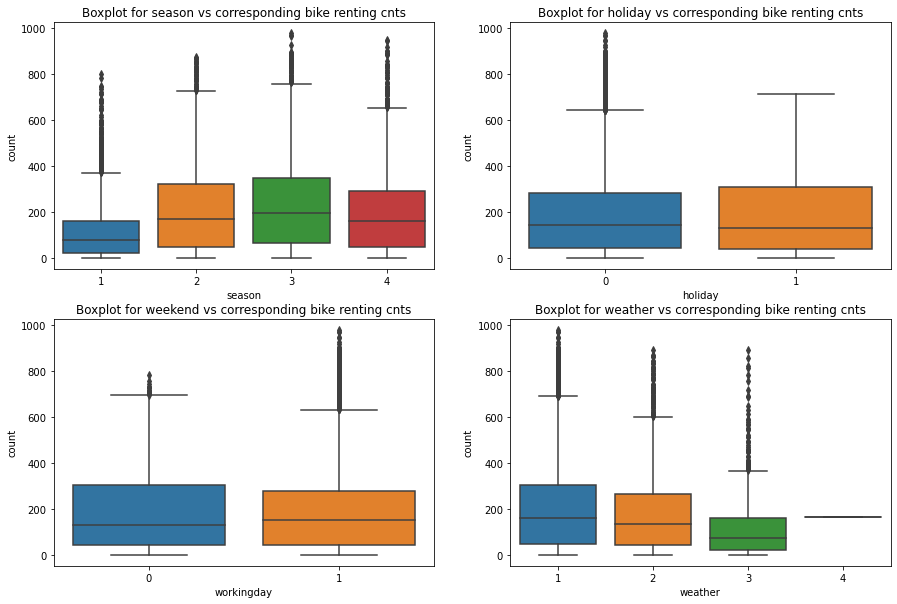

In [17]:
# Visualization before outlier removal
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.boxplot(x = 'season', y = 'count', data = bike_data)
ax1.set_title('Boxplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.boxplot(x = 'holiday', y = 'count', data = bike_data)
ax1.set_title('Boxplot for holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.boxplot(x = 'workingday', y = 'count', data = bike_data)
ax1.set_title('Boxplot for weekend vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.boxplot(x = 'weather', y = 'count', data = bike_data)
ax1.set_title('Boxplot for weather vs corresponding bike renting cnts')

plt.show()

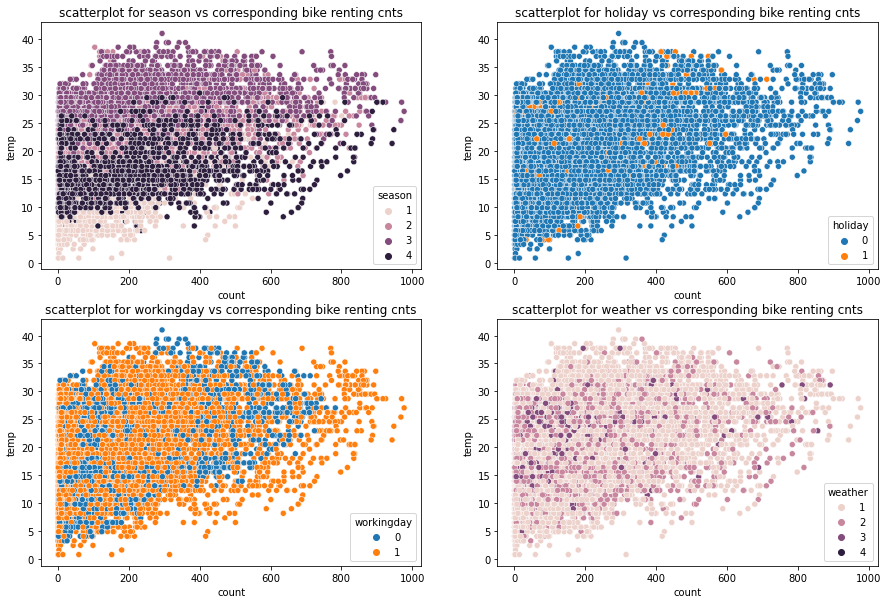

In [19]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'count', y = 'temp',data = bike_data, hue ='season' )
ax1.set_title('scatterplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='count', y = 'temp', data = bike_data, hue ='holiday')
ax1.set_title('scatterplot for holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'count', y = 'temp',data = bike_data, hue ='workingday')
ax1.set_title('scatterplot for workingday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'count',y = 'temp',data = bike_data, hue ='weather')
ax1.set_title('scatterplot for weather vs corresponding bike renting cnts')

plt.show()

In [20]:
bike_dcopy = bike_data.copy() # Taken backup of orginial dataset before removing outliers

In [23]:
q1=bike_data['count'].quantile(0.25)
q3=bike_data['count'].quantile(0.75)
iqr=q3-q1
q1, q3, iqr

(40.0, 270.0, 230.0)

In [25]:
bike_data = bike_data[(bike_data['count'] >= q1 - 1.5*iqr) & (bike_data['count'] <= q3 +1.5*iqr)]
bike_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [26]:
bike_data.shape

(10506, 12)

In [27]:
bike_dcopy.shape[0] - bike_data.shape[0]

380

In [29]:
bike_dcopy.shape[0], bike_data.shape[0]

(10886, 10506)

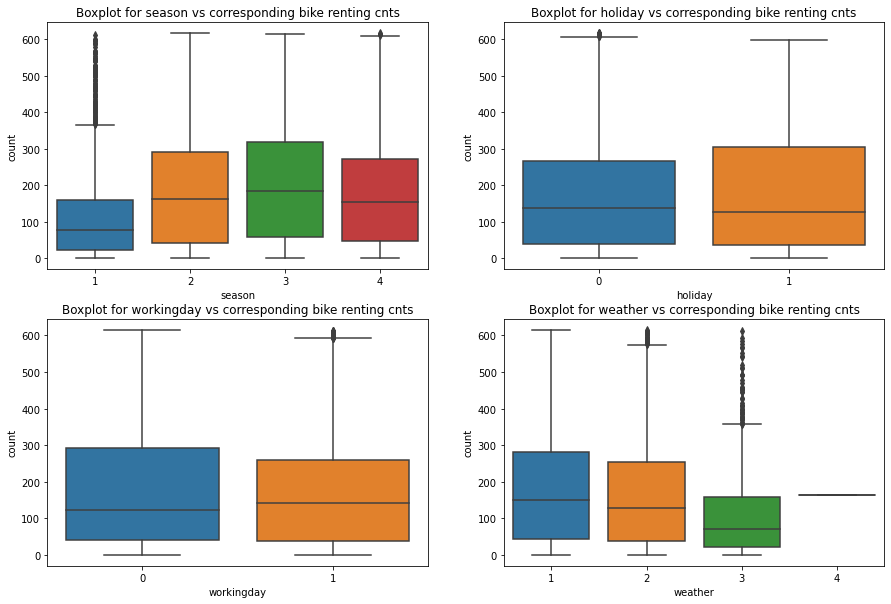

In [31]:
#Visualization after removing outliers
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.boxplot(x = 'season', y = 'count', data = bike_data)
ax1.set_title('Boxplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.boxplot(x = 'holiday', y = 'count', data = bike_data)
ax1.set_title('Boxplot for holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.boxplot(x = 'workingday', y = 'count', data = bike_data)
ax1.set_title('Boxplot for workingday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.boxplot(x = 'weather', y = 'count', data = bike_data)
ax1.set_title('Boxplot for weather vs corresponding bike renting cnts')

plt.show()

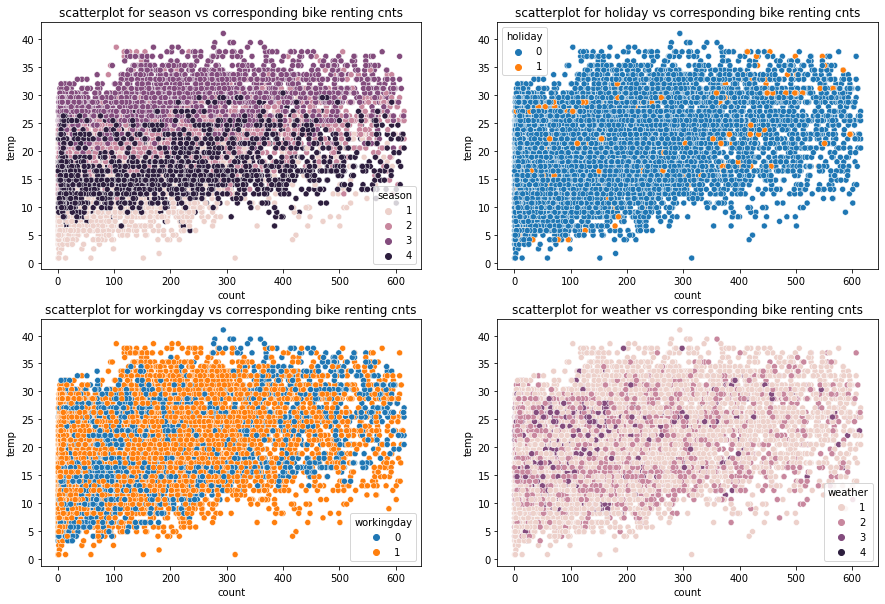

In [33]:
#Visualization after removing outliers
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'count', y = 'temp',data = bike_data, hue ='season' )
ax1.set_title('scatterplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='count', y = 'temp', data = bike_data, hue ='holiday')
ax1.set_title('scatterplot for holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'count', y = 'temp',data = bike_data, hue ='workingday')
ax1.set_title('scatterplot for workingday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'count',y = 'temp',data = bike_data, hue ='weather')
ax1.set_title('scatterplot for weather vs corresponding bike renting cnts')

plt.show()

**Observations:**

- After dealing with the ouliers , 300 rows are removed out of 10886 from the dataset. As we can see from above boxplot and scatterplot, the data now looks more clean.

# Univariate Analysis and Bivariate Analysis:

**timestamp specific EDA:**

As we will be finding some useful insights w.r.t the timeseries data, we will will working on the original dataset before removing outliers which is **bike_dcopy**

In [37]:
#creating a new dataframe for indexing timestamp
bike_datatime = pd.read_csv('bike_sharing.txt')
bike_datatime

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [38]:
bike_dcopy["datetime"].sort_values() 

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [39]:
bike_dcopy['Year'] = bike_dcopy['datetime'].dt.year
bike_dcopy['Month'] = bike_dcopy['datetime'].dt.month
bike_dcopy['Day'] = bike_dcopy['datetime'].dt.day
bike_dcopy

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19


In [40]:
np.sort(bike_dcopy[bike_dcopy['count'] >= bike_dcopy['count'].quantile(0.75)]['Day'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [41]:
bike_dcopy['count'].quantile(0.75)

284.0

In [42]:
bike_dcopy[bike_dcopy['count'] >= bike_dcopy['count'].quantile(0.75)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day
813,2011-02-17 08:00:00,1,0,1,1,13.12,16.665,57,6.0032,18,267,285,2011,2,17
846,2011-02-18 17:00:00,1,0,1,1,27.06,31.060,34,23.9994,52,275,327,2011,2,18
1174,2011-03-13 15:00:00,1,0,0,1,19.68,23.485,39,22.0028,149,155,304,2011,3,13
1260,2011-03-17 08:00:00,1,0,1,1,14.76,17.425,66,8.9981,17,282,299,2011,3,17
1269,2011-03-17 17:00:00,1,0,1,1,20.50,24.240,42,12.9980,48,265,313,2011,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,317,2012,12,19
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334,2012,12,19
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562,2012,12,19
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569,2012,12,19


In [43]:
bike_dcopy[bike_dcopy['count'] >= bike_dcopy['count'].quantile(0.95)]['Month'].unique()

array([ 5,  6,  7,  8,  9, 10,  3,  4, 11, 12], dtype=int64)

In [44]:
bike_dcopy['count'].quantile(0.95)

563.75

In [45]:
bike_dcopy[bike_dcopy['count'] >= bike_dcopy['count'].quantile(0.95)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day
1987,2011-05-09 17:00:00,2,0,1,1,25.42,31.060,38,16.9979,59,539,598,2011,5,9
2011,2011-05-10 17:00:00,2,0,1,1,26.24,31.060,33,0.0000,79,532,611,2011,5,10
2059,2011-05-12 17:00:00,2,0,1,2,26.24,31.060,57,12.9980,54,540,594,2011,5,12
2179,2011-05-17 17:00:00,2,0,1,1,25.42,30.305,65,27.9993,83,521,604,2011,5,17
2203,2011-05-18 17:00:00,2,0,1,1,24.60,29.545,69,8.9981,78,487,565,2011,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,2012-12-17 08:00:00,4,0,1,2,15.58,19.695,87,7.0015,10,582,592,2012,12,17
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0000,10,652,662,2012,12,18
10855,2012-12-18 17:00:00,4,0,1,1,16.40,20.455,47,30.0026,39,533,572,2012,12,18
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678,2012,12,19


In [46]:
bike_dcopy.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


In [89]:
day_data=bike_dcopy.groupby(['Day'])['count'].sum()
day_data

Day
1     103692
2     105381
3     111561
4     112335
5     109115
6     108600
7     105486
8     102770
9     108041
10    111645
11    111146
12    109257
13    111448
14    112406
15    115677
16    109837
17    118255
18    108437
19    110387
Name: count, dtype: int64

In [48]:
year_data = bike_dcopy.groupby(['Year'])['count'].sum()
year_data

Year
2011     781979
2012    1303497
Name: count, dtype: int64

In [50]:
year_data = year_data.reset_index()
year_data

,index,Year,count
0,0,2011,781979
1,1,2012,1303497


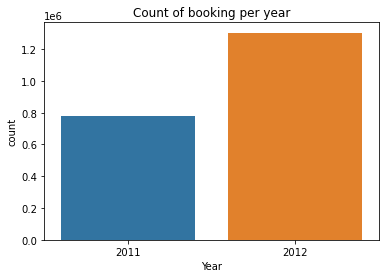

In [51]:
sns.barplot(x='Year',y='count',data=year_data)
plt.title('Count of booking per year')
plt.show()

In [55]:
month_data=bike_dcopy.groupby(['Month'])['count'].sum()
month_data

Month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

In [57]:
month_data=month_data.reset_index()
month_data

,Month,count
0,1,79884
1,2,99113
2,3,133501
3,4,167402
4,5,200147
5,6,220733
6,7,214617
7,8,213516
8,9,212529
9,10,207434


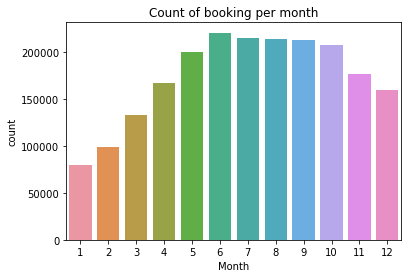

In [60]:
sns.barplot(x='Month',y='count',data=month_data)
plt.title('Count of booking per month')
plt.show()

In [78]:
mon_year_data=bike_dcopy.groupby(['Year','Month'])['count'].sum()
mon_year_data

Year  Month
2011  1         23552
      2         32844
      3         38735
      4         50517
      5         79713
      6         89776
      7         92848
      8         83296
      9         79104
      10        79522
      11        70889
      12        61183
2012  1         56332
      2         66269
      3         94766
      4        116885
      5        120434
      6        130957
      7        121769
      8        130220
      9        133425
      10       127912
      11       105551
      12        98977
Name: count, dtype: int64

In [79]:
mon_year_data=pd.DataFrame(mon_year_data)
mon_year_data

count
Year Month        
2011 1       23552
     2       32844
     3       38735
     4       50517
     5       79713
     6       89776
     7       92848
     8       83296
     9       79104
     10      79522
     11      70889
     12      61183
2012 1       56332
     2       66269
     3       94766
     4      116885
     5      120434
     6      130957
     7      121769
     8      130220
     9      133425
     10     127912
     11     105551
     12      98977

In [80]:
mon_year_data.reset_index(inplace=True)
mon_year_data

,Year,Month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713
5,2011,6,89776
6,2011,7,92848
7,2011,8,83296
8,2011,9,79104
9,2011,10,79522


In [84]:
myy=mon_year_data.pivot('Month','Year','count').fillna(0)
myy

Year,2011,2012
Month,,
1,23552,56332
2,32844,66269
3,38735,94766
4,50517,116885
5,79713,120434
6,89776,130957
7,92848,121769
8,83296,130220
9,79104,133425


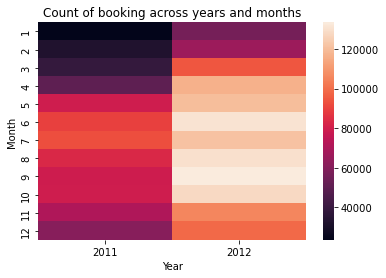

In [88]:
sns.heatmap(myy)
plt.title('Count of booking across years and months')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


**Observations:**

- As the data ranges from 1st Jan 2011 to 19th Dec 2012, the cnt of the bikes rented will also be in this time period of almost 2 years.
- During months of September and October, maximum number of bikes are rented.
- The cnt is less in the cold seasons of winter(Months such as Nov, Dec, Jan, Feb) where due to cold, people prefer mostly not to ride the bikes.
- As we can see, the data contains dates from 1 to 19th of a particular month.
- As we can from the monthwose bar plot , the demand for bikes at the starting months is quite low as compared to months from March 2012 onwards. There's a drop in the middle owing to cold and winter season.
- Booking in 2011 is less as compared to 2012.

In [110]:
# Univariate analysis for numerical/continuous variables
def num_feat(col_data):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(col_data,kde=True,ax=ax[0],color='purple')
    ax[0].axvline(col_data.mean(),color='r',linestyle='--',linewidth=4)
    ax[0].axvline(col_data.median(),color='k',linestyle='dashed',linewidth=4)
    ax[0].axvline(col_data.mode()[0],color='y',linestyle='solid',linewidth=2)
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [111]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10506 non-null  datetime64[ns]
 1   season      10506 non-null  int64         
 2   holiday     10506 non-null  int64         
 3   workingday  10506 non-null  int64         
 4   weather     10506 non-null  int64         
 5   temp        10506 non-null  float64       
 6   atemp       10506 non-null  float64       
 7   humidity    10506 non-null  int64         
 8   windspeed   10506 non-null  float64       
 9   casual      10506 non-null  int64         
 10  registered  10506 non-null  int64         
 11  count       10506 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.4 MB


In [112]:
bike_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [115]:
num_cols=['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [118]:
cat_cols=['season', 'holiday', 'workingday', 'weather']
cat_cols

['season', 'holiday', 'workingday', 'weather']

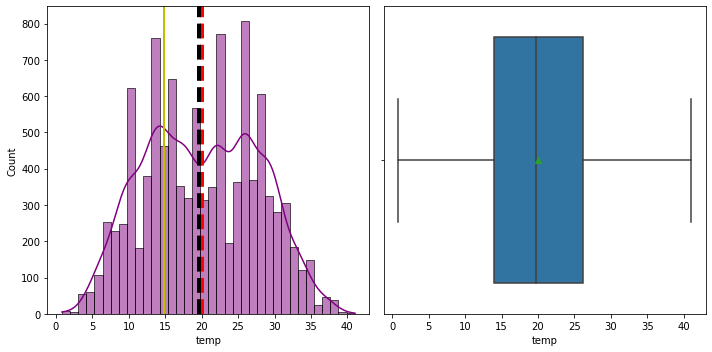

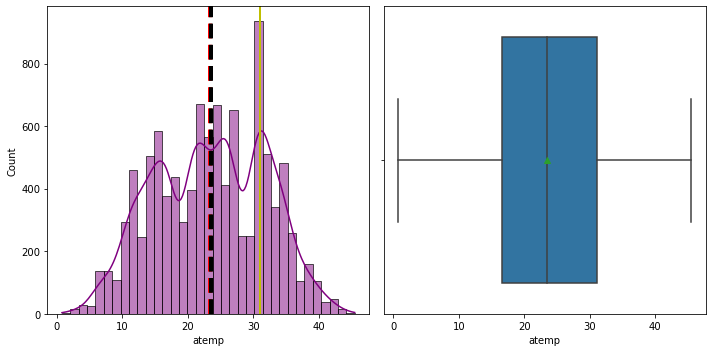

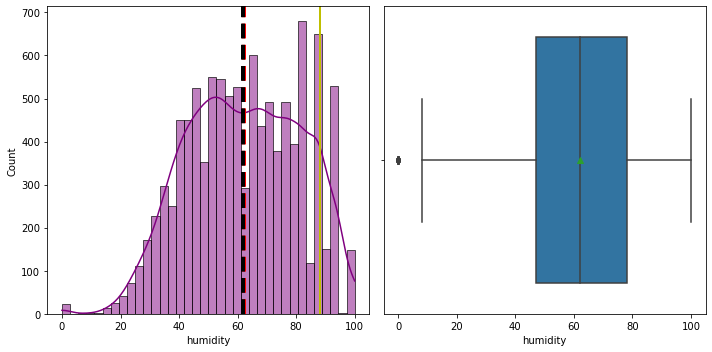

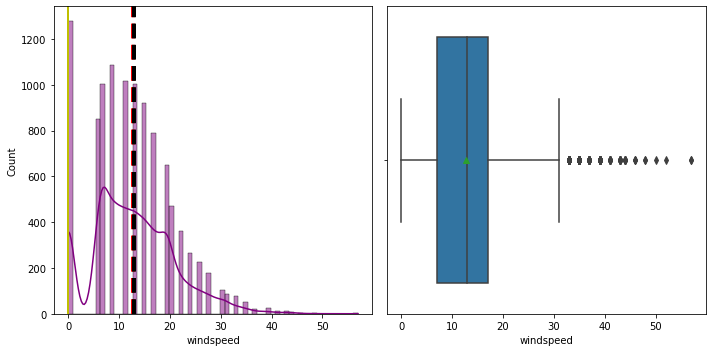

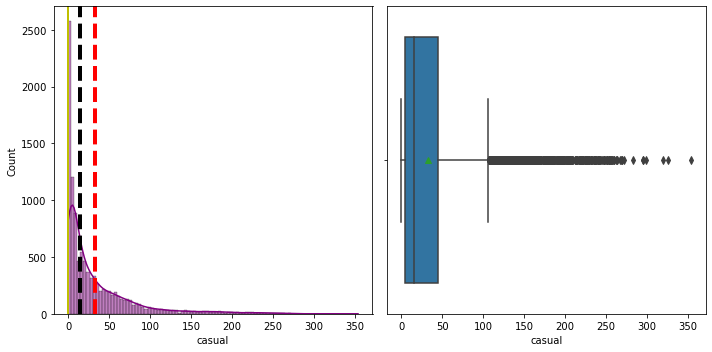

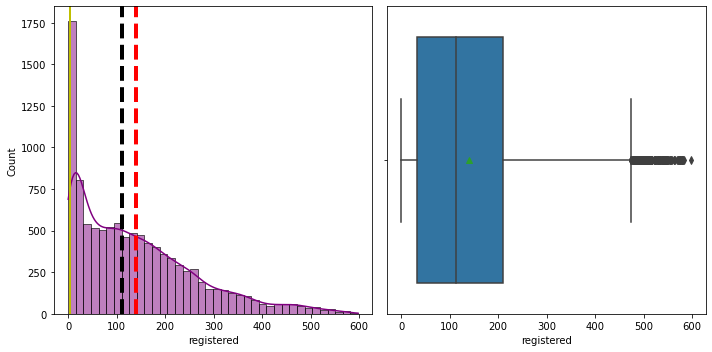

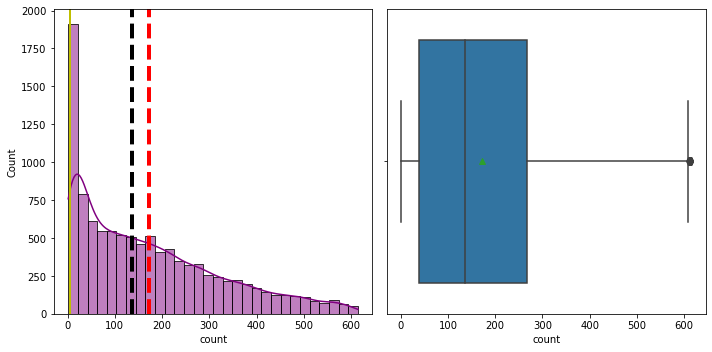

In [116]:
for i in num_cols:
    num_feat(bike_data[i])

**Observations for univariate numerical features:**

- There are outliers in windspeed and casual users which tells us that, the windspeed in not uniform.
- The exponentil decay curve for the count tells that, as the users renting bikes increases, the frequency decreases.

In [131]:
#EDA on Univariate Categorical variables
def cat_feat(col_data):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col_data.name+' wise sale',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
    plt.tight_layout()

In [132]:
cat_cols

['season', 'holiday', 'workingday', 'weather']

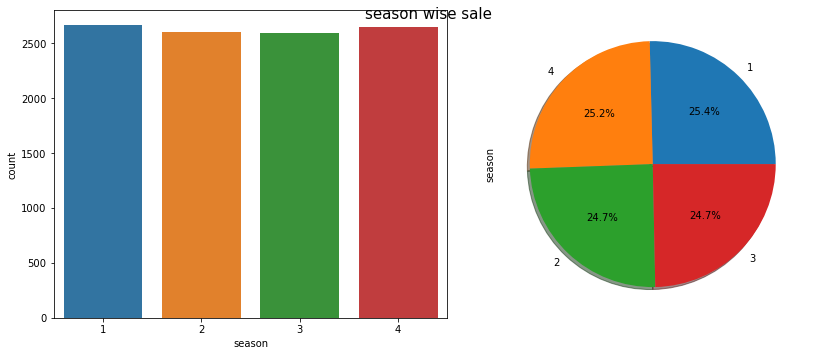

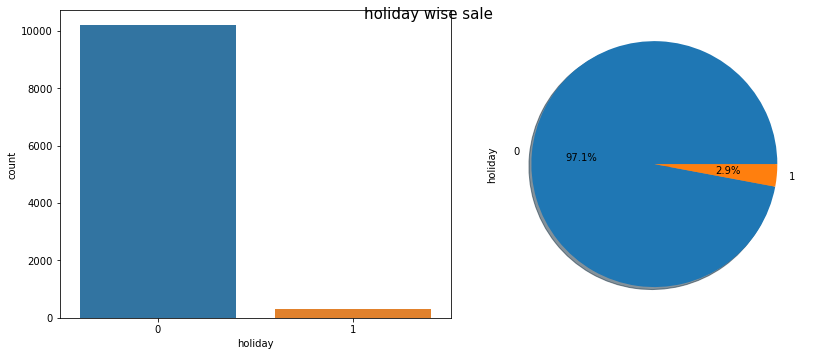

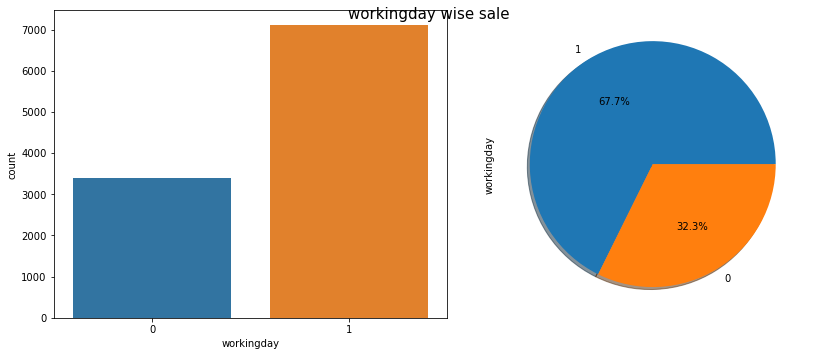

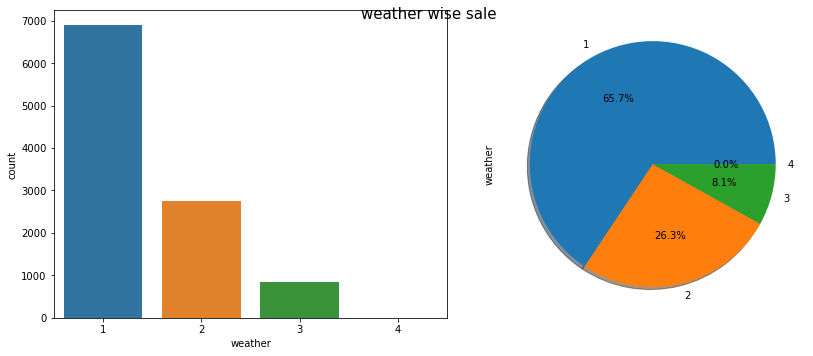

In [133]:
for i in cat_cols:
    cat_feat(bike_data[i])

**Observations for univariate categorical features:**

- For weather, 4th (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) no. of users renting bikes is much low and hence it's good to drop the feature while doing further tests.
- count for bikes rentied in working day is much higher than non working day.
- During holidays, people don't prefer to ride bikes.
- When the weather is Clear with Few clouds, people tend to rent more bikes for their comute.
- During the spring, summer, fall, winter, the count is more or less equal for the users renting bikes

**Corelation between Bivariate features:**

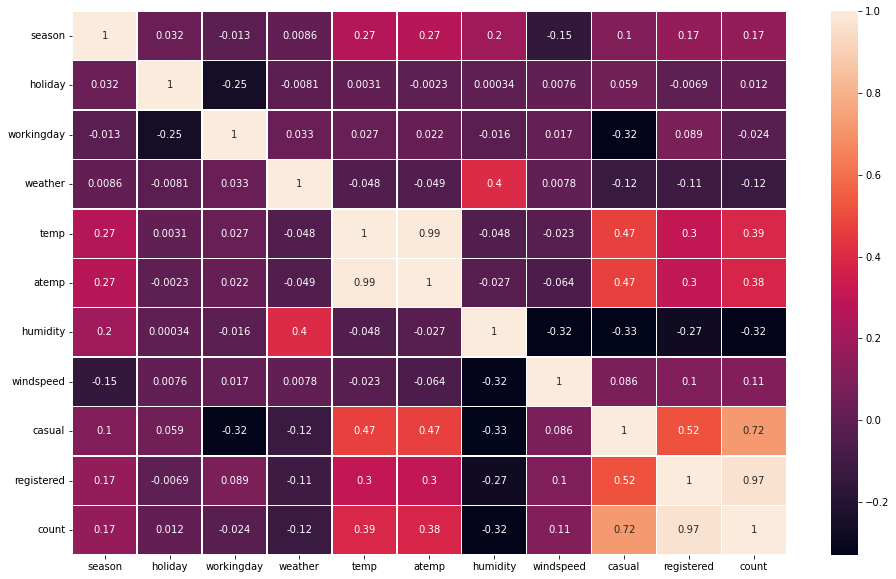

In [142]:
plt.figure(figsize=(16,10))
sns.heatmap(bike_data.corr(),annot=True,linewidth=0.3,linecolor='white')
plt.show()

**Observations::**

- The **registered user** count has higher corelation with the count as compared to the **casual user count.**
- The **windspeed and season** has a very low(near zero) positive corelation with the count which means, the windspeed and seasons doesn't have an effect in the demand of bikes rented.
- The **temperature and user specific feeling of heat/cold** has a moderated corelation (0.3) with the count. People tends to go ot in bright sunny day whne the temp is normal whereas as during harsh conditions such as too hot or too cold, the demand in the bikes has seen a considerable dip.
- The casual users who rents bikes likes to ride the bikes as the temperature is suitable.
- When there's a holiday, user count has seen a considerable dip whereas in working days, the count is normal.

# Two - Sample T-Test

**2- Sample T-Test to check if Holiday has an effect on the number of electric cycles rented**

**Step 1: Define Null & Alternate Hypothesis**
- Setting up Null Hypothesis (H0) and Stating the alternate hypothesis (Ha) and significance level


**H0 : The bike's renting cnt in working days and non- working days are equal.**

**Ha : The bike's renting cnt in working days and non- working days is not equal.**
- alpha = 0.05


**Step 2: Validate the assumptions**

**Two-sample t-test assumptions**

- Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
- Data in each group must be obtained via a random sample from the population.
- Data in each group are normally distributed.
- Data values are continuous.
- The variances for the two independent groups are equal.


In [159]:
bike_data.shape

(10506, 12)

In [160]:
bike_data['workingday'].value_counts(normalize=True)*100

1    67.675614
0    32.324386
Name: workingday, dtype: float64

In [164]:
bike_data['workingday'].value_counts()

1    7110
0    3396
Name: workingday, dtype: int64

In [166]:
working_data=bike_data[bike_data['workingday']==1].sample(3000,replace=False)
working_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1257,2011-03-17 05:00:00,1,0,1,1,13.12,16.665,76,7.0015,0,13,13
4193,2011-10-06 18:00:00,4,0,1,1,22.14,25.760,64,6.0032,59,479,538
5513,2012-01-04 20:00:00,1,0,1,2,8.20,9.850,40,12.9980,2,121,123
4536,2011-11-02 02:00:00,4,0,1,1,12.30,16.665,87,0.0000,0,2,2
10325,2012-11-15 15:00:00,4,0,1,2,15.58,19.695,58,11.0014,26,191,217
...,...,...,...,...,...,...,...,...,...,...,...,...
10706,2012-12-12 12:00:00,4,0,1,2,13.94,18.180,42,0.0000,14,218,232
5108,2011-12-06 22:00:00,4,0,1,3,18.86,22.725,100,11.0014,5,82,87
4872,2011-11-16 02:00:00,4,0,1,2,18.86,22.725,94,7.0015,4,6,10
228,2011-01-10 19:00:00,1,0,1,1,6.56,8.335,47,11.0014,3,92,95


In [167]:
non_working_data=bike_data[bike_data['workingday']==0].sample(3000,replace=False)
non_working_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1533,2011-04-09 18:00:00,2,0,0,2,15.58,19.695,82,7.0015,48,129,177
4798,2011-11-13 00:00:00,4,0,0,2,16.40,20.455,58,12.9980,12,61,73
3477,2011-08-14 19:00:00,3,0,0,1,29.52,34.850,74,15.0013,75,184,259
5042,2011-12-04 04:00:00,4,0,0,1,10.66,15.150,87,0.0000,2,9,11
8476,2012-07-14 13:00:00,3,0,0,2,31.16,35.605,62,6.0032,219,372,591
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,2011-12-04 01:00:00,4,0,0,1,12.30,15.910,75,6.0032,20,54,74
5223,2011-12-11 17:00:00,4,0,0,1,11.48,15.910,30,0.0000,13,150,163
9691,2012-10-08 04:00:00,4,1,0,1,13.12,16.665,87,8.9981,1,6,7
9240,2012-09-08 09:00:00,3,0,0,1,28.70,33.335,74,26.0027,87,261,348


**Checking assumptions of the test (Normality, Equal Variance)**

- Using visualization methods - Histogram, Q-Q plot
- Using statistical methods like levene’s test, Shapiro-wilk test

In [174]:
round(working_data['count'].std()**2,2),round(non_working_data['count'].std()**2,2)

(21955.36, 25141.05)

**Observations:** The variance is not equal for both the samples.

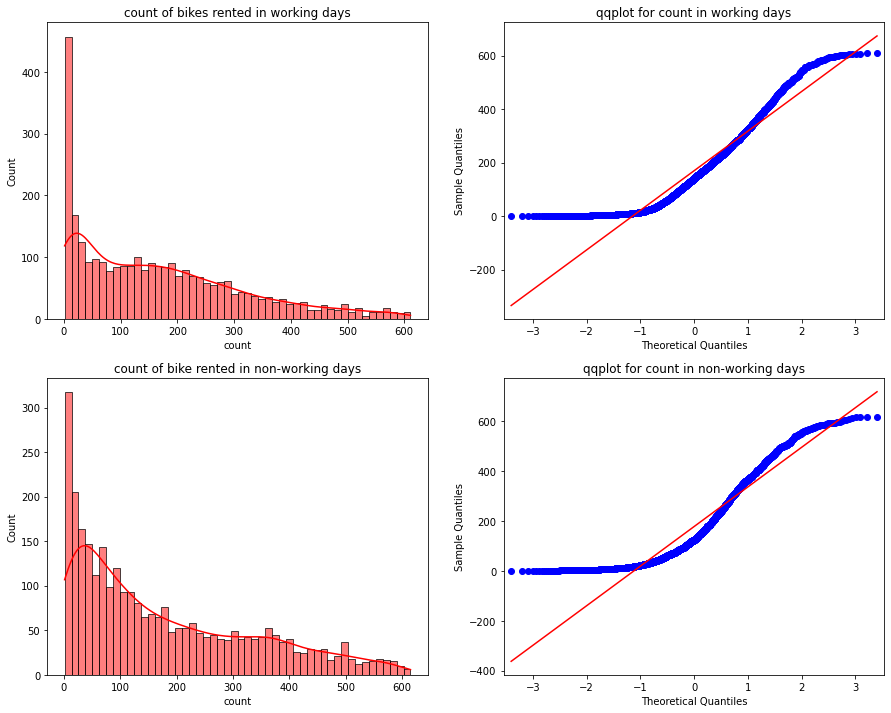

In [202]:
#Checking the normality
fig=plt.figure(figsize=(15,12))

ax1=fig.add_subplot(221)
sns.histplot(data=working_data,x='count',bins=50,kde=True,ax=ax1,color='red')
ax1.set_title('count of bikes rented in working days')

ax2=fig.add_subplot(222)
sm.qqplot(working_data['count'],line='s',ax=ax2)
ax2.set_title('qqplot for count in working days')

ax3=fig.add_subplot(223)
sns.histplot(data=non_working_data,x='count',bins=50,kde=True,ax=ax3,color='red')
ax3.set_title('count of bike rented in non-working days')

ax4=fig.add_subplot(224)
sm.qqplot(non_working_data['count'],line='s',ax=ax4)
ax4.set_title('qqplot for count in non-working days')
plt.show()

In [214]:
# Calculating the p-value and test- statistics usinging ttest_ind() for this right skwed distribution sample.
# Alternative == greater as it's right skewed and one-sided
t_test,p_value=stats.ttest_ind(working_data['count'],non_working_data['count'],equal_var=False)
#,alternative='greater'
t_test, p_value

(-1.9374897141389154, 0.052732609972528884)

**Observations:**

- The distribution of the population samples is right-skewed and it's not normal which violates is our assumption for conducting 2 sample t test. Also the varaince of the samples is unequal.Hence we will do log-transformation
- We got a p-value of 0.05 which is equal to 0.05 and hence we can say that we fail to reject null hypothesis. We will confirm after log - transformation as well

**Applying log on the data - Log Normal Distribution**

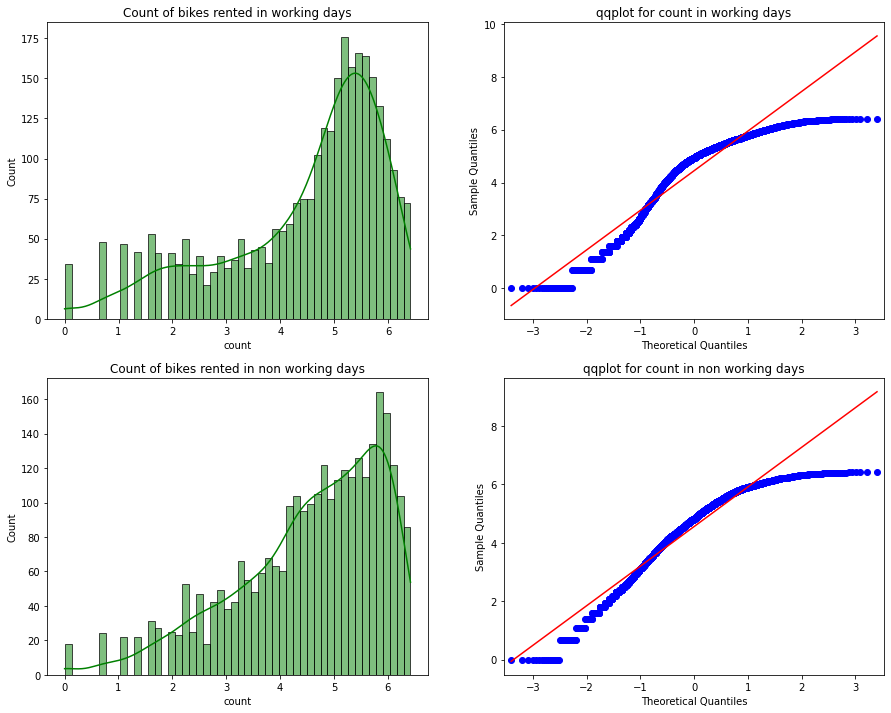

In [239]:
fig=plt.figure(figsize=(15,12))

ax1=fig.add_subplot(221)
sns.histplot(data=np.log(working_data['count']),bins=50,kde=True,ax=ax1,color='green')
ax1.set_title('Count of bikes rented in working days')

ax2=fig.add_subplot(222)
sm.qqplot(np.log(working_data['count']),line='s',ax=ax2)
ax2.set_title('qqplot for count in working days')

ax3=fig.add_subplot(223)
sns.histplot(data=np.log(non_working_data['count']),bins=50,kde=True,ax=ax3,color='green')
ax3.set_title('Count of bikes rented in non-working days')

ax4=fig.add_subplot(224)
sm.qqplot(data=np.log(non_working_data['count']),line='s',ax=ax4)
ax4.set_title('qqplot for count in non-working days')


plt.show()

In [244]:
round(np.log(working_data['count']).std()**2,2),round(np.log(non_working_data['count']).std()**2,2)

(2.25, 1.84)

**Observations:** After taking log on the sample population, we get a near normal distribution with variance very similar to each other. So we can calculate the p-value and test-statistics.

In [250]:
sample_w_log=np.log(working_data['count']).sample(3000)
sample_nw_log=np.log(non_working_data['count']).sample(3000)
sample_w_log,sample_nw_log

(5509     4.875197
 8446     5.940171
 605      4.905275
 10835    4.787492
 2256     4.859812
            ...   
 4577     5.529429
 8977     5.293305
 3934     4.276666
 3153     5.641907
 7078     5.690359
 Name: count, Length: 3000, dtype: float64,
 5976     1.386294
 7356     5.594711
 8855     5.087596
 6935     3.988984
 1361     5.247024
            ...   
 1966     5.159055
 10637    5.416100
 7722     3.258097
 2127     6.122493
 2724     5.602119
 Name: count, Length: 3000, dtype: float64)

In [255]:
statistic,p_value=stats.ttest_ind(sample_w_log,sample_nw_log)
#,alternative='greater'
statistic,p_value

(-2.93199562061449, 0.003380645549751635)

In [261]:
def htResult(p_value):
    significance_level=0.05
    if p_value <=significance_level:
        print('Reject NULL HYPOTHESIS')
    else:
        print('Fail to Reject NULL HYPOTHESIS')

In [262]:
htResult(p_value)

Reject NULL HYPOTHESIS


In [266]:
stats.levene(sample_w_log,sample_nw_log,center='median')

LeveneResult(statistic=6.977418504784444, pvalue=0.008275873247789157)

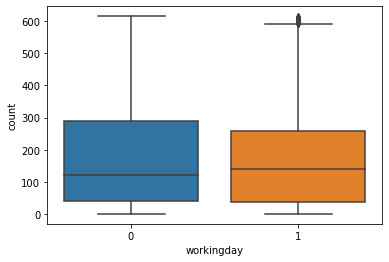

In [268]:
sns.boxplot(x='workingday',y='count',data=bike_data)

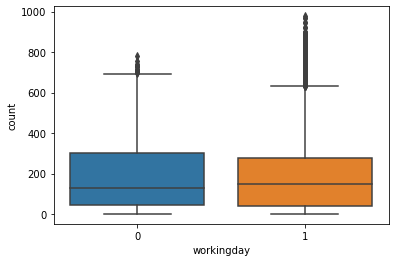

In [269]:
sns.boxplot(x='workingday',y='count',data=bike_dcopy)

**Conclusion : As the p value < alpha(0.05) , we reject H0 and thus we can say that the count of renting of bikes in both working and non-working days is un-equal. And we can confirm this using the boxplot as well**

# Chi-square test to check if weather is dependent on the season

Assumptions:

- Assumption 1: Both variables are categorical.
- Assumption 2: All observations are independent.
- Assumption 3: Cells in the contingency table are mutually exclusive.
- Assumption 4: Expected value of cells should be 5 or greater in at least 80% of cells.
    - It’s assumed that the expected value of cells in the contingency table should be 5 or greater in at least 80% of cells and that no cell should have an expected value less than 1.

**H0 : Both weather_code and seasons are independent of each other**

**Ha : There is dependency of weather_code on Seasons**

aplha = 0.05

In [274]:
contigency_table=pd.crosstab(bike_data.weather,bike_data.season,margins=True,margins_name='Total')
contigency_table

season,1,2,3,4,Total
weather,,,,,
1,1743,1692,1822,1641,6898
2,713,686,576,784,2759
3,211,222,194,221,848
4,1,0,0,0,1
Total,2668,2600,2592,2646,10506


In [277]:
contigency_table=contigency_table.rename(columns={'Total':'Row_Total'})
contigency_table

season,1,2,3,4,Row_Total
weather,,,,,
1,1743,1692,1822,1641,6898
2,713,686,576,784,2759
3,211,222,194,221,848
4,1,0,0,0,1
Total,2668,2600,2592,2646,10506


A Chi-Square Test of Independence

- As we doing independence test for 2 categorical vaiarbles we are using Chi-squared test.
- Expected value of cells should be 5 or greater in at least 80% of cells & that no cell should have an expected value less than 1.
- We can use the following formula to calculate the expected values for each cell in the contingency table:
- Expected value = (row sum * column sum) / table sum.

In [281]:
n=contigency_table.at['Total','Row_Total']
n

10506

In [283]:
exp=contigency_table.copy()
exp

season,1,2,3,4,Row_Total
weather,,,,,
1,1743,1692,1822,1641,6898
2,713,686,576,784,2759
3,211,222,194,221,848
4,1,0,0,0,1
Total,2668,2600,2592,2646,10506


In [291]:
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        v=(((contigency_table.at[x,"Row_Total"])*(contigency_table.at["Total",y]))/n).round(2)
        exp.at[x,y]=float(v)
exp

season,1,2,3,4,Row_Total
weather,,,,,
1,1751,1707,1701,1737,6898
2,700,682,680,694,2759
3,215,209,209,213,848
4,0,0,0,0,1
Total,2668,2600,2592,2646,10506


In [294]:
#exp.iloc[[0,1,2,3,4,5,6],[0,1,2,3]]
#exp

**Weather 4 has expected counts less than 5, so we will drop it.**

In [296]:
bike_data['weather'].value_counts()

1    6898
2    2759
3     848
4       1
Name: weather, dtype: int64

In [298]:
bike_data['season'].value_counts()

1    2668
4    2646
2    2600
3    2592
Name: season, dtype: int64

In [306]:
bike_data=bike_data[~(bike_data['weather']==4)]
bike_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [307]:
bike_data['weather'].value_counts()

1    6898
2    2759
3     848
Name: weather, dtype: int64

In [309]:
pd.crosstab(bike_data.weather,bike_data.season)

season,1,2,3,4
weather,,,,
1,1743,1692,1822,1641
2,713,686,576,784
3,211,222,194,221


In [314]:
contigency_table=pd.crosstab(bike_data.weather,bike_data.season,margins=True,margins_name='Total')
contigency_table

season,1,2,3,4,Total
weather,,,,,
1,1743,1692,1822,1641,6898
2,713,686,576,784,2759
3,211,222,194,221,848
Total,2667,2600,2592,2646,10505


In [315]:
contigency_table=contigency_table.rename(columns={'Total':'Row_Total'})
contigency_table

season,1,2,3,4,Row_Total
weather,,,,,
1,1743,1692,1822,1641,6898
2,713,686,576,784,2759
3,211,222,194,221,848
Total,2667,2600,2592,2646,10505


In [316]:
n=contigency_table.at['Total','Row_Total']
n

10505

In [317]:
exp=contigency_table.copy()
exp

season,1,2,3,4,Row_Total
weather,,,,,
1,1743,1692,1822,1641,6898
2,713,686,576,784,2759
3,211,222,194,221,848
Total,2667,2600,2592,2646,10505


In [318]:
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        v=(((contigency_table.at[x,"Row_Total"])*(contigency_table.at["Total",y]))/n).round(2)
        exp.at[x,y]=float(v)
exp

season,1,2,3,4,Row_Total
weather,,,,,
1,1751,1707,1702,1737,6898
2,700,682,680,694,2759
3,215,209,209,213,848
Total,2667,2600,2592,2646,10505


In [320]:
#exp.iloc[[0,1,2,3,4,5,6],[0,1,2,3]]
#exp

**No Weather code has expected counts less than 5, so we will continue with Chi Sqaure test**

In [323]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10505 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10505 non-null  datetime64[ns]
 1   season      10505 non-null  int64         
 2   holiday     10505 non-null  int64         
 3   workingday  10505 non-null  int64         
 4   weather     10505 non-null  int64         
 5   temp        10505 non-null  float64       
 6   atemp       10505 non-null  float64       
 7   humidity    10505 non-null  int64         
 8   windspeed   10505 non-null  float64       
 9   casual      10505 non-null  int64         
 10  registered  10505 non-null  int64         
 11  count       10505 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.0 MB


In [324]:
pd.crosstab(bike_data['weather'],bike_data['season'])

season,1,2,3,4
weather,,,,
1,1743,1692,1822,1641
2,713,686,576,784
3,211,222,194,221


In [328]:
bike_data['weather']=bike_data['weather'].astype('category')
bike_data['weather'].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [329]:
bike_data['season'].dtype

dtype('int64')

In [330]:
bike_data['season']=bike_data['season'].astype('category')
bike_data['season'].dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

In [332]:
weather_season_dep=pd.crosstab(bike_data['weather'],bike_data['season'])
weather_season_dep

season,1,2,3,4
weather,,,,
1,1743,1692,1822,1641
2,713,686,576,784
3,211,222,194,221


In [335]:
stat,p_value,dof,expected=stats.chi2_contingency(weather_season_dep)
stat,p_value,dof,expected

(43.915286672463445,
 7.683595629690518e-08,
 6,
 array([[1751.25806759, 1707.263208  , 1702.01009043, 1737.46863398],
        [ 700.45245121,  682.85578296,  680.75468824,  694.93707758],
        [ 215.2894812 ,  209.88100904,  209.23522132,  213.59428843]]))

In [338]:
alpha=0.05
if p_value >=alpha:
        print('We fail to reject the Null Hypothesis Ho and thus we can conclude that weather proportion is not significantly different in different seasons')
else:
        print('We reject the Null Hypothesis Ho')

We reject the Null Hypothesis Ho


**p- value (7.683595629690518e-08) < alpha(0.05) --> so we can reject H0** Which means weather and seasons have a significant dependency and Both weather and seasons are not independent of each other

**We can conclude that we can reject the H0 as we have enough evidence to reject the null hypothesis, so it seems like weather and Seasons are dependent on each other**

**ANNOVA to check if no. of cycles rented is similar or different in different weather and season**

**Assumptions:**

- Normality – that each sample is taken from a normally distributed population
- Sample independence – that each sample has been drawn independently of the other samples
- Variance equality – that the variance of data in the different groups should be the same
- Your dependent variable – here, “count”, should be continuous – that is, measured on a scale which can be subdivided using increments

**1. weather**

**H0 (Null Hupothesis) :** count of bikes rented is same in diffrent types of weather_code

**Ha (Alternate Hupothesis) :** count of bikes rented is different in diffrent types of weather_code

alpha: 0.05

- We will be working on **bike_dcopy** which is already created as a deep copy of the original dataset. 
- This is because, we need to conclude on the basis of **all the data** and not when we remove the ouliers

In [341]:
bike_dcopy['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

**Checking assumptions of the test (Normality, Equal Variance)**

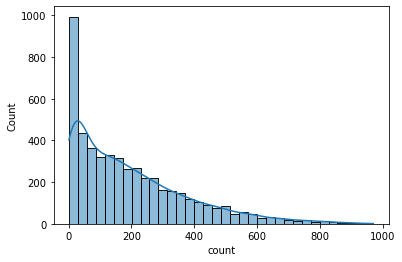

In [349]:
sns.histplot(bike_dcopy['count'].sample(5000),kde=True)

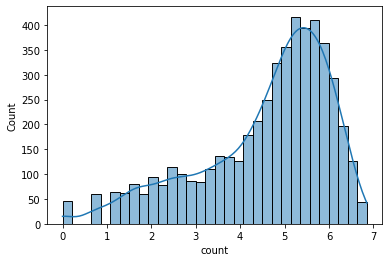

In [350]:
#Taking the log of the above distribution sample as it's not normal.
sns.histplot(np.log(bike_dcopy['count'].sample(5000)),kde=True)

In [351]:
# H0 : Series is Normal
# Ha : Series is not Normal
# alpha = 0.05
stats.shapiro(bike_dcopy['count'].sample(5000))

ShapiroResult(statistic=0.870898962020874, pvalue=0.0)

**Observations:** Even after taking log, the distribution is not exactly normal. So our assumption doesn't holds true. Also, we have confirmed with the statistical test -Shapiro wik test that the series is not normal.Still we will be going ahead with the test just to check the results.

In [353]:
bike_dcopy['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [355]:
# Removing the weather type 4 as it's variance id diffrent than others and will fail our assumptions
bike_dcopy=bike_dcopy[~(bike_dcopy['weather']==4)]

In [356]:
bike_dcopy['weather'].value_counts()

1    7192
2    2834
3     859
Name: weather, dtype: int64

**Normality Test:**
We will perform normality check using **Shapiro test.**

The hypothesis of this test are:

- Null Hypothesis Ho - series is normal
- Alternative Hypothesis Ha - series is not normal

In [368]:
from scipy.stats import shapiro
def normality_check(series,alpha=0.05):
    statistic, p_value = shapiro(series)
    print(f'p value {p_value}')
    print(f'statistic value {statistic}')
    if p_value >= alpha:
        print('We fail to reject the Null Hypothesis H0')
    else:
        print('We reject the Null Hypothesis H0')

In [369]:
normality_check(bike_dcopy['weather'].sample(1500,replace=True))

p value 0.0
statistic value 0.6550259590148926
We reject the Null Hypothesis H0


In [370]:
shapiro(bike_dcopy['weather'])

ShapiroResult(statistic=0.6566624641418457, pvalue=0.0)

**Equality of Variance Test:**

We will perform equivalence check for using using Levene's test.

The hypothesis of this test are:

- Null Hypothesis Ho - Variances are equal
- Alternative Hypothesis Ha - Variances are not equal

In [375]:
bike_dcopy.groupby(['weather'])['count'].describe()
# Variance is different for diff weather 

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


In [379]:
from scipy.stats import levene
series1=bike_dcopy[bike_dcopy['weather']==1]['count'].sample(1400)
series2=bike_dcopy[bike_dcopy['weather']==1]['count'].sample(1400)
series3=bike_dcopy[bike_dcopy['weather']==1]['count'].sample(1400)

In [382]:
levene(series1,series2,series3)

LeveneResult(statistic=0.6593147384967605, pvalue=0.5172591942937996)

In [386]:
def variance_check(series1,series2,series3,alpha=0.05):
    statistic,pvalue = levene(series1,series2,series3)
    print(f'statistic value = {statistic}')
    print(f'p value = {pvalue}')
    if (pvalue>=alpha).all():
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

In [387]:
variance_check(series1,series2,series3)

statistic value = 0.6593147384967605
p value = 0.5172591942937996
We fail to reject the Null Hypothesis Ho


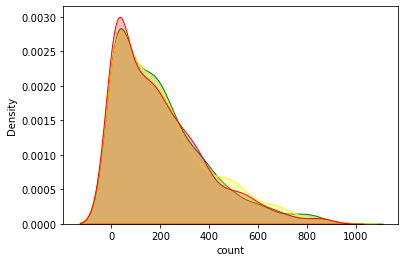

In [393]:
sns.kdeplot(series1,color='green',shade='green')
sns.kdeplot(series2,color='yellow',shade='yellow')
sns.kdeplot(series3,color='red',shade='red')
plt.show()

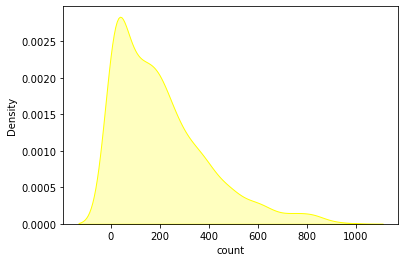

In [394]:
sns.kdeplot(series1,color='yellow',shade='yellow')


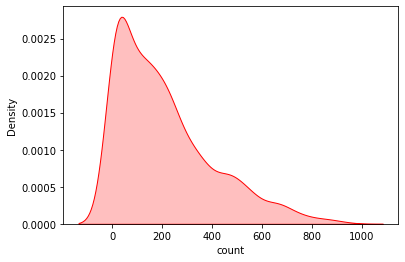

In [395]:
sns.kdeplot(series2,color='red',shade='red')

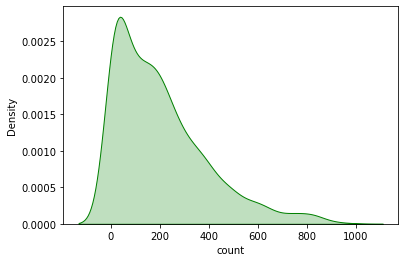

In [396]:
sns.kdeplot(series1,color='green',shade='green')

**Although our assumption failed for normality but for varaince passed, we will continue with One way Annova just to check what's the result.**



In [400]:
statistic,pvalue=stats.f_oneway(series1,series2,series3)
statistic,pvalue

(1.0461766978233038, 0.35136981493551195)

In [403]:
statis,pval=levene(series1,series2,series3)
statis,pval

(0.6593147384967605, 0.5172591942937996)

**Conclusion : As the p value > alpha(0.05) , we accept H0 and thus we can conclude that cnt of bikes remains same with a change in weather.**

**2. Seasons**

**H0 (Null Hypothesis) :** count of bikes rented is same in different types of seasons.

**Ha (Alternate Hypothesis) :** count of bikes rented is different in different types of seasons

**alpha: 0.05**

In [404]:
bike_dcopy['season'].value_counts()

4    2734
3    2733
2    2733
1    2685
Name: season, dtype: int64

In [412]:
bike_dcopy.groupby(['season'])['count'].describe()
# The variance is different for all the 4 seasons

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [414]:
statis,pval=stats.f_oneway(bike_dcopy[bike_dcopy['season']==1]['count'].sample(2500),
              bike_dcopy[bike_dcopy['season']==2]['count'].sample(2500),
              bike_dcopy[bike_dcopy['season']==3]['count'].sample(2500),
              bike_dcopy[bike_dcopy['season']==4]['count'].sample(2500)
              )
statis,pval

(221.72248236427637, 2.9071789481110713e-139)

In [416]:
statist,pvalu=stats.levene(bike_dcopy[bike_dcopy['season']==1]['count'].sample(2500),
              bike_dcopy[bike_dcopy['season']==2]['count'].sample(2500),
            bike_dcopy[bike_dcopy['season']==3]['count'].sample(2500),
              bike_dcopy[bike_dcopy['season']==4]['count'].sample(2500))
statist,pvalu

(175.00347637555166, 1.3810514831501984e-110)

**Conclusion : As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in season.**

# Insights ,Conclusions , Inferences and Recommendations:

- There are total 4 categorical features namely Season, holiday, workingday, weather and 7 numerical/continuos features and 1 datatime object. In total 12 independent features with 10886 rows.
- Missing data or Null values are not present , neither any duplicated row is there.
- As the data ranges from 1st Jan 2011 to 19th Dec 2012, the cnt of the bikes rented will also be in this time period of almost 2 years.
- During months of September and October, maximum number of bikes are rented.
- The cnt is less in the cold seasons of winter(Months such as Nov, Dec, Jan, Feb) where due to cold, people prefer mostly not to ride the bikes.
- We can see, the data contains dates from 1 to 19th of a particular month.
- Also from the month wise bar plot , the demand for bikes at the starting months is quite low as compared to months from March 2012 onwards. There's a drop in the middle owing to cold and winter season.
- There are outliers in windspeed and casual users which tells us that, the windspeed in not uniform. Whereas the casual user cnt varies as they are not registered and not serious in riding the bikes.
- The exponential decay curve for the cnt(reg and non-reg) tells that, as the users renting bikes increases, the frequency decreases.
- For weather_code, in the fourth category i.e (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) no. of users renting bikes is much low and hence it's good to drop the feature while doing further tests.
- cnt for bikes rented in working day is much higher than non working day.
- During holidays, people don't prefer to ride bikes.
- When the weather_code is Clear with Few clouds, people tend to rent more bikes for their comute.
- During the spring, summer, fall, winter, the cnt is more or less eual for the users renting bikes
- The registered user cnt has higher co-relation with the cnt as compared to the casual user cnt.
- The windspeed and season has a very low(near zero) positive co-relation with the cnt which means, the windspeed and seasons doesn't have an effect in the demand of bikes rented.
- The temperature and user specific feeling of heat/cold has a moderated co-relation (0.3) with the cnt. People tends to go ot in bright sunny day when the t1 is normal whereas as during harsh conditions such as too hot or too cold, the demand in the bikes has seen a considerable dip.
- The casual users who rents bikes likes to ride the bikes as the t1erature is suitable.
- When there's a is_holiday, user cnt has seen a considerable dip whereas in working days, the cnt is normal.

**2 sample t-test:**
- The distribution of the population samples is right-skwed and it's not normal which violates is our assumption for conducting 2 sample t test. Also the varaince of the samples is unequal.Hence we will do log-transformation
- We got a p-value of 0.91 which is greater than 0.05 and hence we can say that we can accept the null hypothesis. We will confirm after log - transformation as well
- After taking log on the sample population, we get a near normal distribution with variance very similar to each other. So we can calculate the p-value and test-statistics.
- Conclusion : As the p value < alpha(0.05) , we reject H0 and thus we can say that the cnt of renting of bikes in both working and non-working days is un-equal. And we can confirm this using the boxplot as well.

**Chi-Square test:**
- p- value (6.734426550686341e-08) < alpha(0.05) --> so we can reject H0 Which means weather_code and seasons have a significant dependency and Both weather_code and seasons are not independent of each other
- We can conclude that our (chi_stat > chi_critical), we can reject the H0 as we have enough evidence to reject the null hypothesis, so it seems like weather_code and Seasons are dependent on each other.

**One-way Anova:**
- Even after taking log, the distribution is not exactly normal. So our assumption doesn't holds true. Also, we have confirmed with the statistical test -Shapiro wilk test that the series is not normal. Still we will be going ahead with the test just to check the results.
- As the p value > alpha(0.05) , we accept H0 and thus we can conclude that cnt of bikes remains same with a change in weather.
- As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in season.

**In order to conclude, we can say that the major factors affecting the count of bikes rented is season. The working and non working days can't be considered as a significant factor in predicting the future of rental business. At the same time, the business team must focus on the months other than winter months for increasing the bike parking zones as during the winter months of (Nov, Dec, Jan, Feb), theres's a considerable dip in the cnt. So the team can utilize these months for serving some other purpose such as renting electric cars, etc which can be a comfortable means for commute in cold.**